In [1]:
!pip install pandas

    100% |████████████████████████████████| 9.5MB 5.3MB/s eta 0:00:01
    100% |████████████████████████████████| 14.8MB 3.8MB/s ta 0:00:011
You are using pip version 19.0.3, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install matplotlib

    100% |████████████████████████████████| 11.5MB 1.1MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 1.1MB 1.3MB/s ta 0:00:01
    100% |████████████████████████████████| 3.0MB 1.1MB/s ta 0:00:011
You are using pip version 19.0.3, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install sklearn

    100% |████████████████████████████████| 22.3MB 796kB/s ta 0:00:011
    100% |████████████████████████████████| 307kB 1.2MB/s ta 0:00:01    47% |███████████████▏                | 143kB 868kB/s eta 0:00:01
    100% |████████████████████████████████| 25.9MB 902kB/s ta 0:00:011
  Running setup.py install for sklearn ... done
You are using pip version 19.0.3, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [5]:
!pip install keras

    100% |████████████████████████████████| 4.0MB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 645kB 826kB/s ta 0:00:01
You are using pip version 19.0.3, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
!pip install tensorflow

    100% |████████████████████████████████| 454.3MB 174kB/s eta 0:00:011   22% |███████▏                        | 102.1MB 2.6MB/s eta 0:02:17    24% |███████▉                        | 111.3MB 48.2MB/s eta 0:00:08    26% |████████▍                       | 119.1MB 1.2MB/s eta 0:04:38    61% |███████████████████▋            | 278.9MB 2.8MB/s eta 0:01:03    62% |████████████████████            | 284.2MB 45.2MB/s eta 0:00:04    82% |██████████████████████████▍     | 373.9MB 473kB/s eta 0:02:50    94% |██████████████████████████████▎ | 430.0MB 1.7MB/s eta 0:00:15
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/7a/e881b5abb54db0e6e671ab088d079c57ce54e8a01a3ca443f561ccadb37e/typing_extensions-3.7.4.3-py3-none-any.whl
    100% |████████████████████████████████| 1.0MB 1.2MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/p

  Using cached https://files.pythonhosted.org/packages/a3/12/b92740d845ab62ea4edf04d2f4164d82532b5a0b03836d4d4e71c6f3d379/requests_oauthlib-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/1e/a94a8d635fa3ce4cfc7f506003548d0a2447ae76fd5ca53932970fe3053f/pyasn1-0.4.8-py2.py3-none-any.whl
    100% |████████████████████████████████| 153kB 1.4MB/s ta 0:00:01
  Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Found existing installation: typing-extensions 3.10.0.0
    Uninstalling typing-extensions-3.10.0.0:
      Successfully uninstalled typing-extensions-3.10.0.0
  Running setup.py install for termcolor ... done
  Running setup.py install for wrapt ... done
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0
You are using pip version 19.0.3, however version 21.1.2 is available.
You should consider upgrading via

In [4]:
df=pd.read_csv("NSE-TATA.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


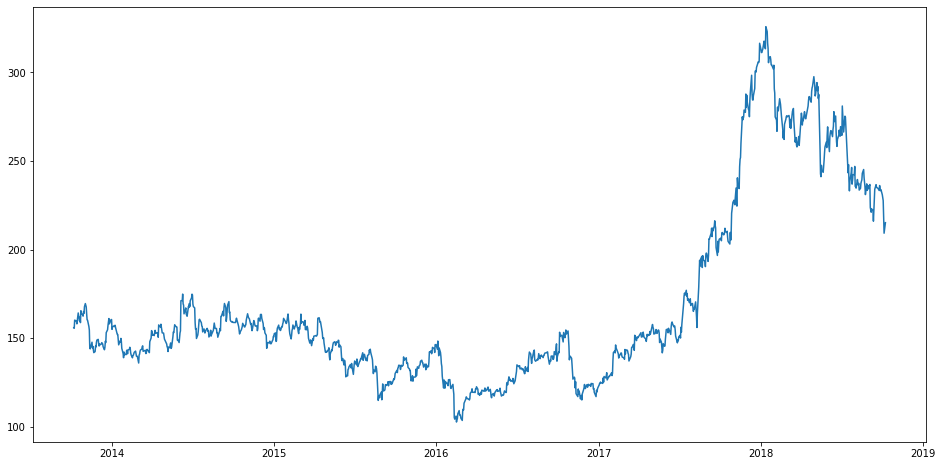

In [5]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [9]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [12]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 21s - loss: 9.8141e-04


In [16]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[207.2699 ],
       [208.39314],
       [209.18211],
       [209.85048],
       [210.80815],
       [211.3856 ],
       [211.57925],
       [211.68234],
       [211.06133],
       [209.82622],
       [208.24277],
       [207.95457],
       [207.4563 ],
       [207.82082],
       [210.45314],
       [214.8045 ],
       [219.2553 ],
       [223.19739],
       [225.95607],
       [227.48807],
       [229.94028],
       [230.40974],
       [229.864  ],
       [231.93059],
       [233.82063],
       [235.02557],
       [238.08409],
       [242.13828],
       [246.12604],
       [250.94731],
       [258.1814 ],
       [264.7377 ],
       [270.03247],
       [273.9129 ],
       [277.17444],
       [279.19153],
       [282.33035],
       [283.66318],
       [285.42487],
       [286.18457],
       [285.45956],
       [284.41486],
       [282.3417 ],
       [282.07123],
       [283.41232],
       [287.22385],
       [289.2087 ],
       [289.54355],
       [289.09866],
       [288.88272],


In [14]:
lstm_model.save("saved_model.h5")

/home/aswin/logicals/trade/nsc/env/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


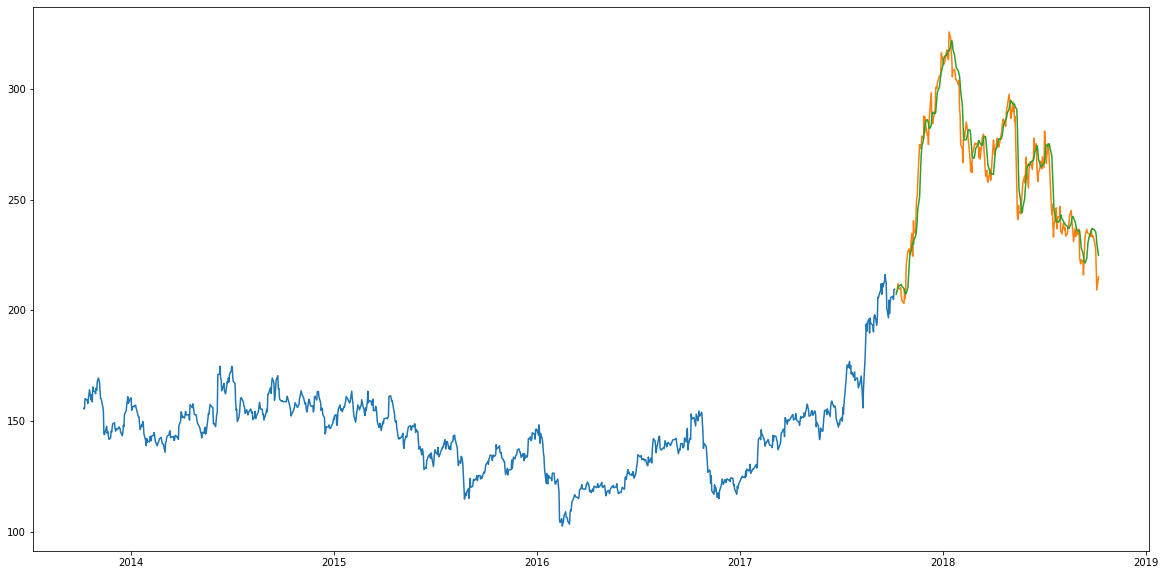

In [15]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])